In [1]:
import numpy as np
import pylab as plt
from lpa_pdb_diagnostics import *
from scipy.constants import e, c, m_e, epsilon_0
import os
import matplotlib
from IPython.display import clear_output

%matplotlib inline

Setting the directory path where the data are located:

In [2]:
dir_path = "//Volumes/Orsay2/UBUNTU_Gilles/V10GM015/data/"

Setting the path for the results:

In [3]:
res_path = config.result_path

#Laser - Plasma Parameters
Here we define some of the laser plasma parameters.

In [4]:
# Some definitions of the laser plasma parameters
lambda0 = 0.8e-6
w0 = 2*np.pi*c/lambda0
laser_waist = 20e-6
plasma_dens = 4.307e24
plasma_length = 5.1e-3
wp = np.sqrt(plasma_dens * e**2/ (epsilon_0 * m_e))
lambda_plasma = 2*np.pi*c/wp
circ_m = 1

#Numerical Parameters
Here we define the necessary numerical parameters for the analysis

In [5]:
#longitudinal direction 
zmax = 2*lambda0
zmin = zmax - 4*lambda_plasma
nzplambda = 20
w_size = zmax - zmin
Nz = int(w_size*nzplambda/lambda0)
dz = w_size/Nz

#transverse direction
xmax = 100e-6
xmin = 0 # for cylindrical coordinates
nxplambda = 2
Nx = int((xmax - xmin)*nxplambda/lambda0)
dx = (xmax - xmin)/Nx

#time (valid only for circ simulation)
circ_coeffs = [ 0.2105, 1.0, 3.5234, 8.5104, 15.5059, 24.5037 ]

if circ_m < len(circ_coeffs):
    circ_alpha = circ_coeffs[circ_m]
else:
    circ_alpha = circ_m**2 - 0.4

cdt = 1./np.sqrt((1 + circ_alpha)/dx**2 + 1./dz**2)

#Generate values for file reading

In [6]:
inf = 0
sup = 0
period_int = 1000
period_ext = 1000
val = values( inf, sup, period_int, period_ext, plasma_length/(cdt) )
longitudinal_position = np.array(val)*cdt

We create an array of file names that we analyze.

In [7]:
field = np.empty(len(val),dtype="S100")
N5 = np.empty(len(val),dtype="S100")
N6 = np.empty(len(val),dtype="S100")
N7 = np.empty(len(val),dtype="S100")
H = np.empty(len(val),dtype="S100")

# Initialize file names
for i, v in enumerate(val):
    field[i] = dir_path + "fields%06d.pdb" %v
    N5[i] = dir_path + "N5%06d.pdb" %v
    N6[i] = dir_path + "N6%06d.pdb" %v
    N7[i] = dir_path + "N7%06d.pdb" %v
    H[i] = dir_path + "H%06d.pdb" %v

#Reading files

We can either read a single file, or we can read a number of files using a loop.

##Single file reading

Example Case: Evaluation of laser c$\tau$ at one given instant
The instant that I would like to investigate is at $1.5mm$.

In [8]:
it_instant = int(5.1e-3/cdt/period_int) #round off to the nearest 1000
f = FieldInstant(field[it_instant], np.pi/2, quantities= ["E", "zfield"])

** Processing ** Fields: Intialisation of //Volumes/Orsay2/UBUNTU_Gilles/V10GM015/data/fields129000.pdb **


####Zero crossing analysis
Returns the bucket positions, can be used in particle selection.

In [9]:
buckets = f.wakefield_zero_crossing()

###Fields analysis

####2D laser field
A 2D field laser plot using matplotlib

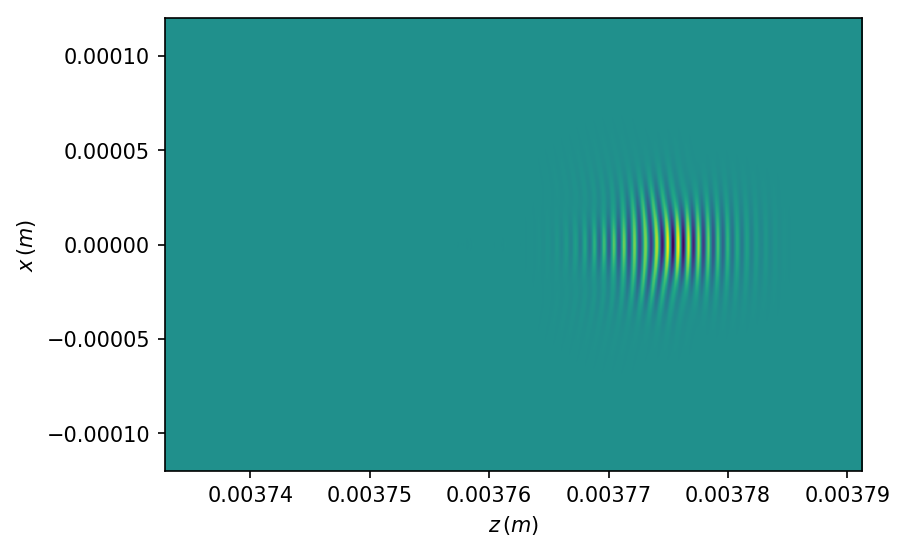

In [10]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
plt.imshow(f.laser_field, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####1D laser field

(3732.8072749600424, 3791.2078660908883)

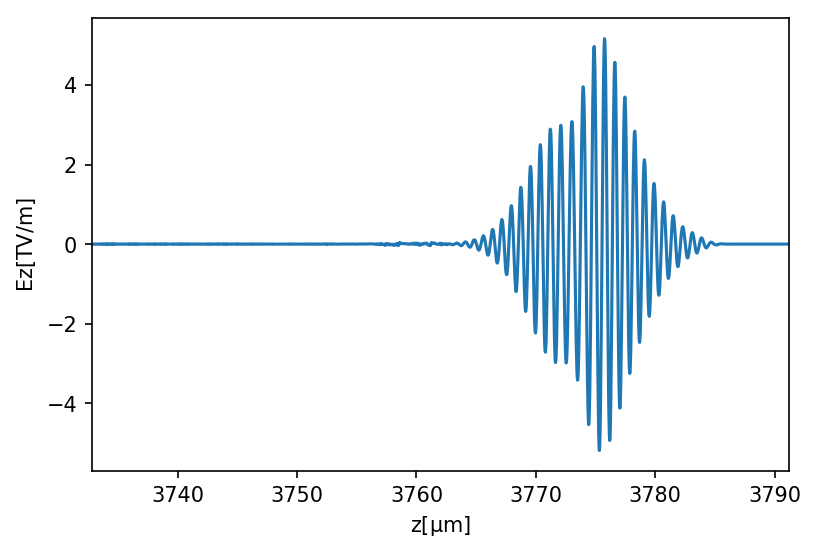

In [11]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.laser_field[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

####Laser c$\tau$

In [12]:
f.laser_ctau()

7.1411696090430391e-06

####Laser envelop

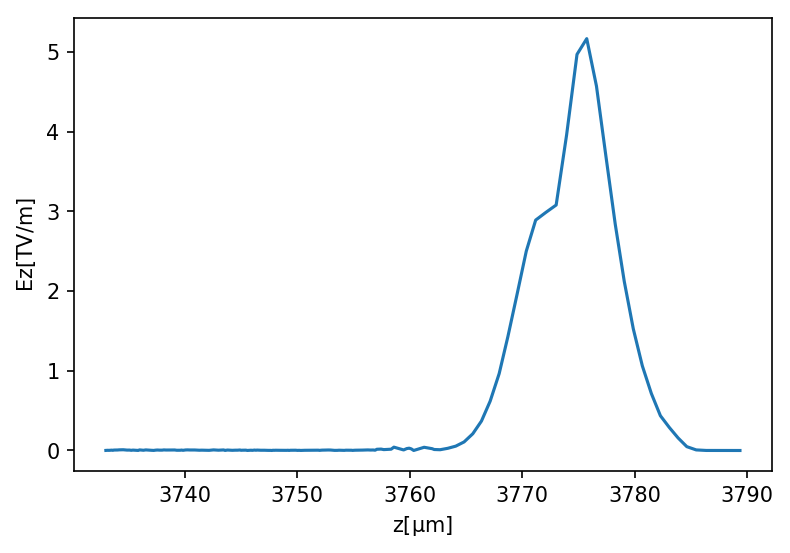

In [13]:
z, env = f.laser_envelop()
#Plotting
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(z)*1e6, np.array(env)*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{Ez[TV/m]}$")
#axarr.set_xlim( min(np.array(z)*1e6), max(np.array(z)*1e6))

####2D wakefield

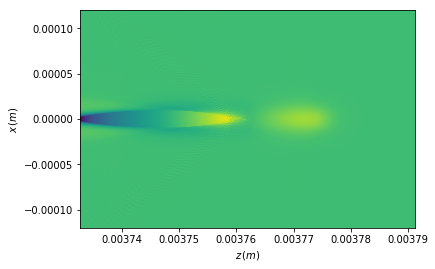

In [14]:
fig.patch.set_facecolor('white')
plt.imshow(f.ez, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####2D transverse field

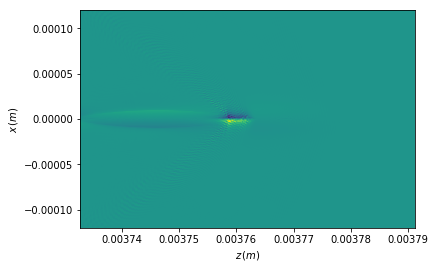

In [15]:
fig.patch.set_facecolor('white')
plt.imshow(f.ex, aspect = 'auto', extent = f.extent )
plt.xlabel(r"$z\,(m)$")
plt.ylabel(r"$x\,(m)$")

####Superposition of 1D wakefield and transverse field

(3732.8072749600424, 3791.2078660908883)

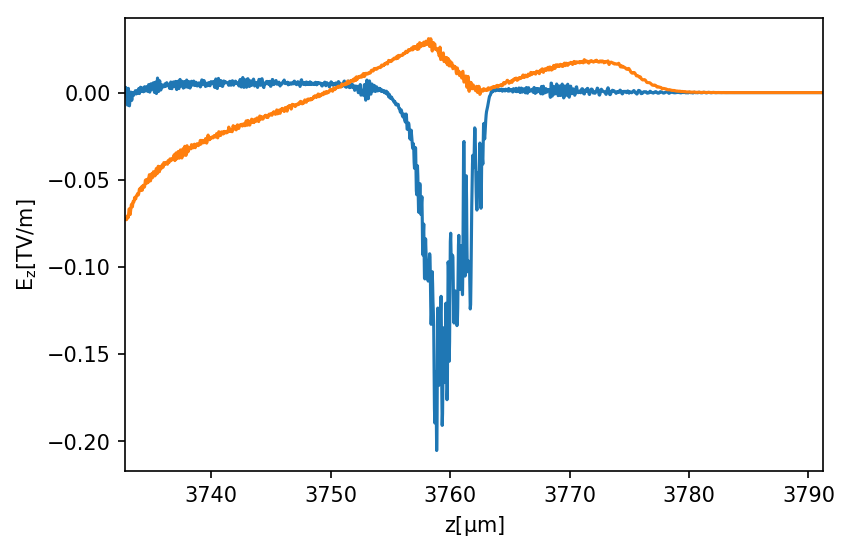

In [16]:
fig, axarr = plt.subplots(dpi = 150)
fig.patch.set_facecolor('white')
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ex[int(f.shape[0]/2)-9,:])*1e-12 )
axarr.plot( np.array(f.zfield)*1e6, np.array(f.ez[int(f.shape[0]/2),:])*1e-12 )
axarr.set_xlabel(r"$\mathrm{z[\mu m]}$")
axarr.set_ylabel(r"$\mathrm{E_z[TV/m]}$")
axarr.set_xlim( min(np.array(f.zfield)*1e6), max(np.array(f.zfield)*1e6))

###Particle analysis

####Beam spectrum
Instantiate partilcle objects

In [17]:
HH = ParticleInstant(H[it_instant], quantities = ["Weight", "Position", "Momentum"])
N66 = ParticleInstant(N6[it_instant], quantities = ["Weight", "Position", "Momentum"])
N77 = ParticleInstant(N7[it_instant], quantities = ["Weight", "Position", "Momentum"])
qdict = HH.get_qdict() ###qdict is normally the same for all particle quantities

** Processing ** Particles: Initialisation of //Volumes/Orsay2/UBUNTU_Gilles/V10GM015/data/H129000.pdb **
** Processing ** Particles: Initialisation of //Volumes/Orsay2/UBUNTU_Gilles/V10GM015/data/N6129000.pdb **
** Processing ** Particles: Initialisation of //Volumes/Orsay2/UBUNTU_Gilles/V10GM015/data/N7129000.pdb **


We choose particles here, two parameters of choice are offered: gamma_threshold and region of interest.

In [18]:
# we choose particles which have a gamma threshold between 250 and 800
# optionally, we can also choose particles using ROI argument in the select method. Example: ROI=bucket[0], will choose
# the first accelerating bucket.
gamma_inf = 20
gamma_sup = 800
cPH = HH.select( gamma_threshold = [gamma_inf, gamma_sup])#, ROI = buckets[-1] )
cPN6 = N66.select( gamma_threshold = [gamma_inf, gamma_sup])#, ROI = buckets[-1] )
cPN7 = N77.select( gamma_threshold = [gamma_inf, gamma_sup])#, ROI = buckets[-1] )

ck_all_particles = quant_concatenate([cPN6,cPN7], keep_object_name= True) 
#keeping the information on the species
c_all_particles = quant_concatenate([cPN6,cPN7])

####Beam peak evaluation and beam energy spread
We use the total energy spectrum to evaluate these properties. We can also indicate to only focus on the particles in the peak by re-filtering using ROI_by_peak

A file named beam_spectrum_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **


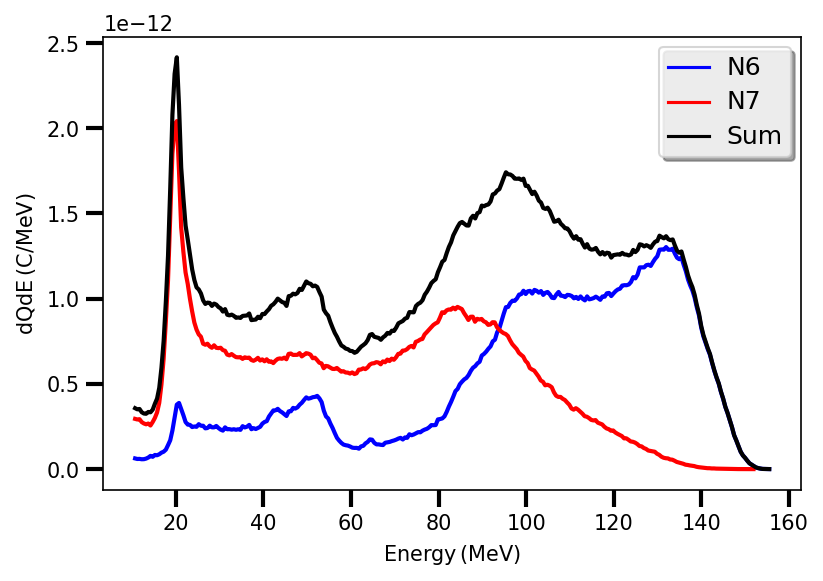

In [19]:
energy, dQdE = beam_spectrum(val[it_instant], 
                             ck_all_particles[qdict["gamma"]], 
                             ck_all_particles[qdict["w"]], lwrite=True,
                             leg=["N6","N7","Sum"])

Peaks are situated at:
Index : 242
Energy: 131.967163 MeV
Charge: 1.366399 pC/MeV
Delta E: 80.975134 MeV, Delta E/E: 0.613601


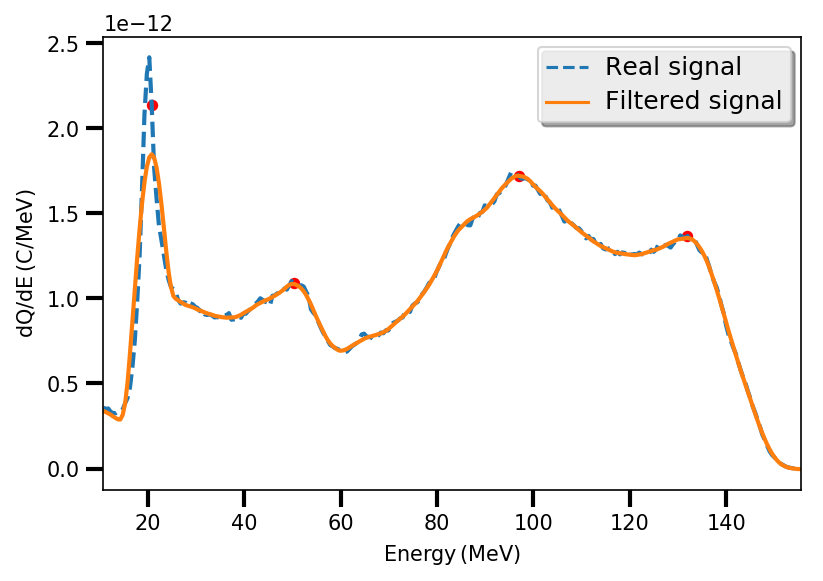

In [20]:
if energy is not None:
    t_energy = energy[-1]
    t_dQdE = dQdE[-1]
    Ipeak, Epeak, Cpeak, ROI_by_peak = beam_peak( t_energy, t_dQdE, peak_width = 20.0,
                   plot_peak_search = True, plot_ROI_search = True)

    if Ipeak is not None:
        print "Peaks are situated at:"
        print "Index : %d" %Ipeak[-1]
        print "Energy: %f MeV" %Epeak[-1]
        print "Charge: %f pC/MeV" %(Cpeak[-1]*1e12)
        peak = (Ipeak[-1], Epeak[-1], Cpeak[-1])
        deltaE , deltaEE = beam_energy_spread( t_energy, t_dQdE, peak = peak)
    else:
        deltaE , deltaEE = beam_energy_spread( t_energy, t_dQdE )

    print "Delta E: %f MeV, Delta E/E: %f" %(deltaE, deltaEE)

In [21]:
# If want to focus only on particles in the peak, run this cell. Otherwise comment it.
# Here we found only 1 peak, threfore we pass ROI_by_peak[0], 
#it's possible to look at different peaks by changing 
# the index.
if energy is not None and ROI_by_peak:
    print ("You have chosen particles situated between %g MeV and %g MeV. " 
            %(ROI_by_peak[-1][0], ROI_by_peak[-1][1]))
    
    # Conversion back to gamma
    ROI_gamma = [[ROI_by_peak[i][j]/0.511 for j in xrange(len(ROI_by_peak[0]))] \
                 for i in xrange(len(ROI_by_peak))]
    
    # Selection of particles
    cPH = HH.select( gamma_threshold = ROI_gamma[-1] )
    cPN6 = N66.select( gamma_threshold = ROI_gamma[-1] )
    cPN7 = N77.select( gamma_threshold = ROI_gamma[-1] )
else:
    clear_output

You have chosen particles situated between 61.0735 MeV and 141.737 MeV. 


Group all the particles before doing beam spectrum analysis. There are two ways to group particles and they are manifested using "keep_object_name" variable. If it's true, the information on the origin of these particles, ie the species of the particles is kept; otherwise, all the species' particle quantities will be merged.

In [22]:
if energy is not None and ROI_by_peak:    
    ck_all_particles = quant_concatenate([cPN6,cPN7], keep_object_name= True) 
    #keeping the information on the species
    c_all_particles = quant_concatenate([cPN6,cPN7])

####Beam statistics
Here we present the average and standard deviation of beam transverse positions, and momenta. The analysis here takes into account all trapped electrons, regardless the species

#####Beam transverse positions
Taking into account all trapped electrons, regardless the species

In [23]:
avg_x = wavg( c_all_particles[qdict["x"]] ,c_all_particles[qdict["w"]] )
avg_y = wavg( c_all_particles[qdict["y"]] ,c_all_particles[qdict["w"]] )
avg_z = wavg( c_all_particles[qdict["z"]] ,c_all_particles[qdict["w"]] )
print u"<x>: %f \u03BCm" %( 1e6*avg_x )
print u"<y>: %f \u03BCm" %( 1e6*avg_y )
print u"<z>: %f \u03BCm" %( 1e6*avg_z )

std_x = wstd( c_all_particles[qdict["x"]] ,c_all_particles[qdict["w"]] )
std_y = wstd( c_all_particles[qdict["y"]] ,c_all_particles[qdict["w"]] )
std_z = wstd( c_all_particles[qdict["z"]] ,c_all_particles[qdict["w"]] )
print u"\u03c3x: %f \u03BCm" %( 1e6*std_x )
print u"\u03c3y: %f \u03BCm" %( 1e6*std_y )
print u"\u03c3z: %f \u03BCm" %( 1e6*std_z )

<x>: 0.108383 μm
<y>: 0.007828 μm
<z>: 3760.123421 μm
σx: 1.195603 μm
σy: 1.625516 μm
σz: 1.251296 μm


#####Beam transverse momenta
Taking into account all trapped electrons, regardless the species

In [24]:
avg_px = wavg( c_all_particles[qdict["ux"]] ,c_all_particles[qdict["w"]] )
avg_py = wavg( c_all_particles[qdict["uy"]] ,c_all_particles[qdict["w"]] )
print u"<px>: %f m_e*c" %(avg_px)
print u"<py>: %f m_e*c" %(avg_py)
std_px = wstd( c_all_particles[qdict["ux"]] ,c_all_particles[qdict["w"]] )
std_py = wstd( c_all_particles[qdict["uy"]] ,c_all_particles[qdict["w"]] )
print u"\u03c3px: %f m_e*c" %(std_px)
print u"\u03c3py: %f m_e*c" %(std_py)

<px>: 0.030435 m_e*c
<py>: -0.067755 m_e*c
σpx: 1.212617 m_e*c
σpy: 1.583181 m_e*c


#####Beam length
Taking into account all trapped electrons, regardless the species

In [25]:
b_length = std_z*1e15/c
print u"\u03c4_b: %f fs" %(b_length)


τ_b: 4.173874 fs


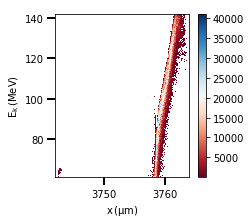

In [39]:
Hnorm = beam_spectrogram(val[it_instant],  c_all_particles[qdict["gamma"]],  c_all_particles[qdict["w"]],  
                 c_all_particles[qdict["z"]])#, bin_num = (100,100) )

####Beam emittance

In transverse directions

A file named Histogram_emittance_x_all_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named Histogram_emittance_y_all_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
Emittance in x-direction: 1.416963 mm.mrad
Emittance in y-direction: 2.521864 mm.mrad


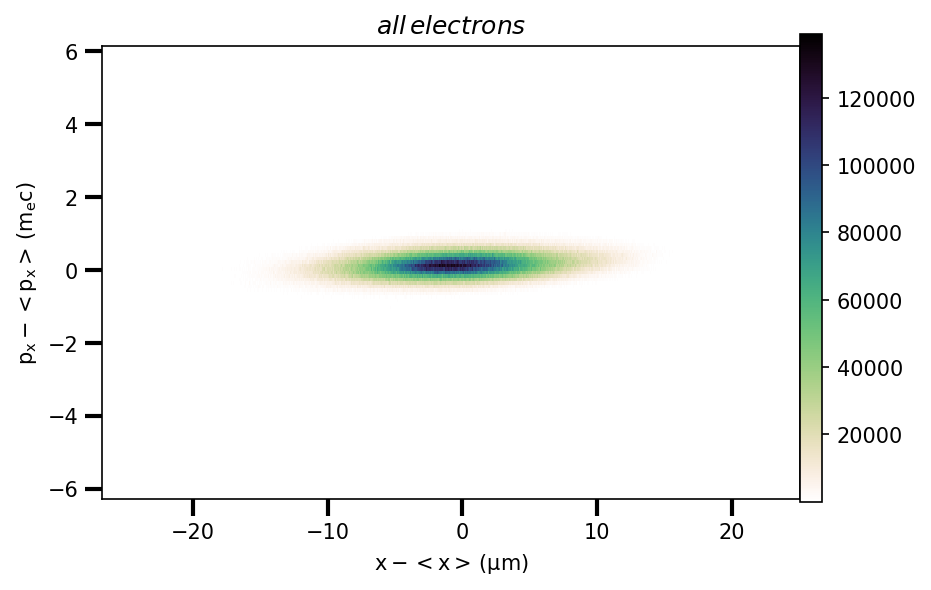

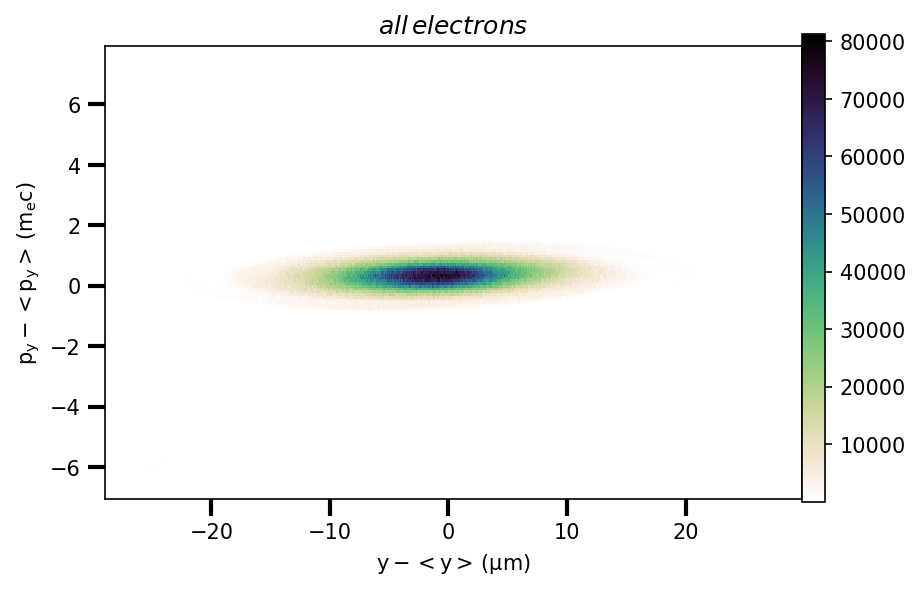

In [27]:
emitx = beam_emittance( val[it_instant],  c_all_particles, qdict, "x", 
                       histogram= True, lplot=True, lsavefig=True, lwrite=True ) 
emity = beam_emittance( val[it_instant],  c_all_particles, qdict, "y", 
                       histogram= True, lplot=True, lsavefig=True, lwrite=True )
print "Emittance in x-direction: %f mm.mrad" %(emitx*1e6)
print "Emittance in y-direction: %f mm.mrad" %(emity*1e6)

Decomposition by species

A file named Histogram_emittance_x_N6_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named Histogram_emittance_y_N6_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
N6: Emittance in x-direction: 1.517619 mm.mrad
N6: Emittance in y-direction: 2.542747 mm.mrad
A file named Histogram_emittance_x_N7_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named Histogram_emittance_y_N7_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
N7: Emittance in x-direction: 1.254736 mm.mrad
N7: Emittance in y-direction: 2.475050 mm.mrad


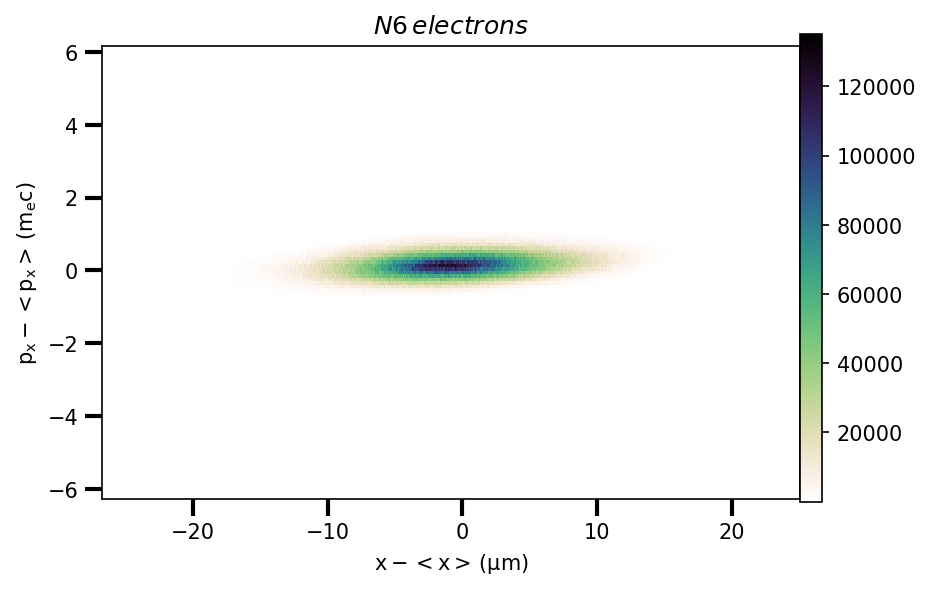

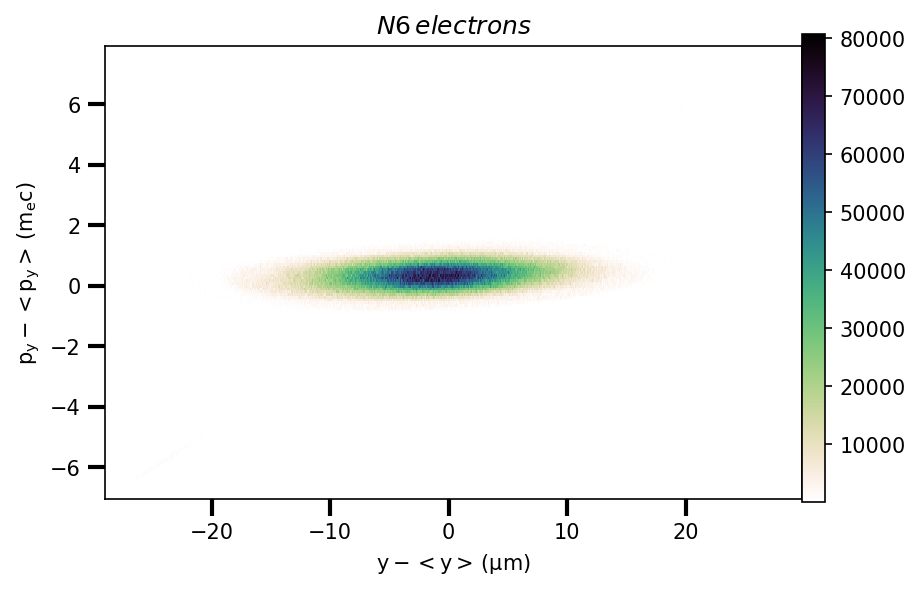

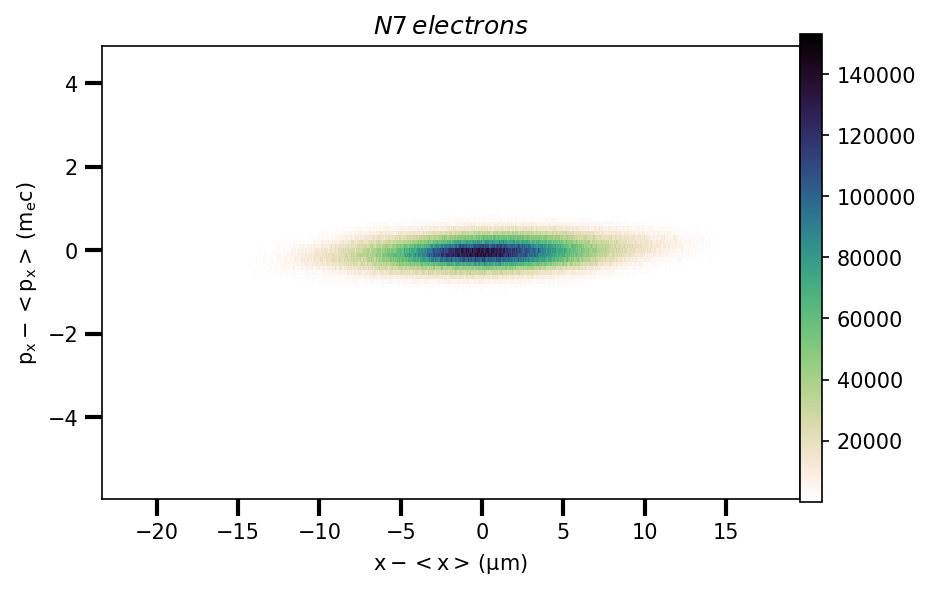

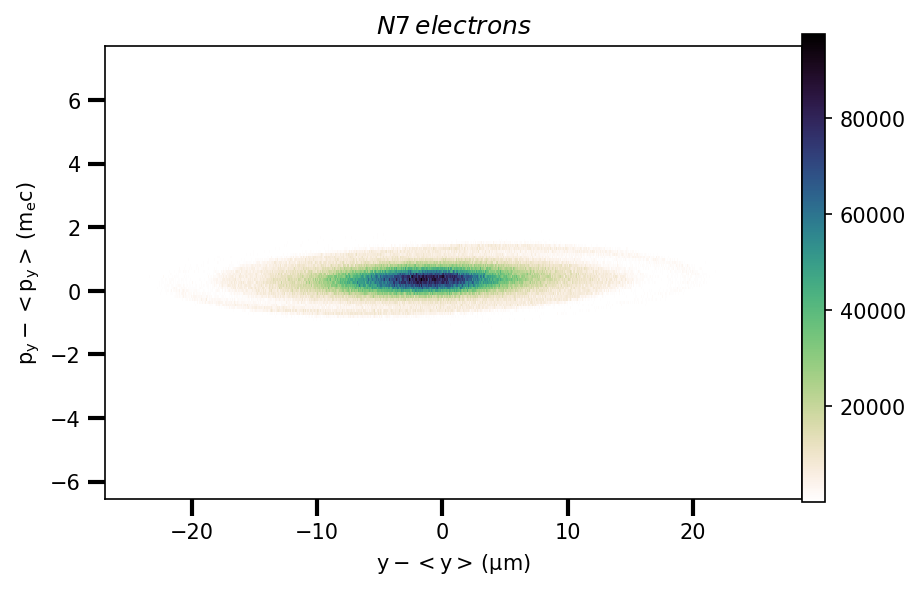

In [28]:
species = ["N6", "N7"]
emitx_sp = []
emity_sp = []


if np.array(ck_all_particles).size!=0:
    # Transpose the matrix for reading only if there are data in ck_all_particles
    transpose_ck_all_particles = np.transpose(ck_all_particles)

    for index, sp_name in enumerate(species):
        emitx_sp.append( beam_emittance( val[it_instant], 
                                        transpose_ck_all_particles[index], qdict, "x", 
                                        species = sp_name, histogram= True, 
                                        lplot=True, lsavefig=True, lwrite=True ) )
        emity_sp.append( beam_emittance( val[it_instant], 
                                        transpose_ck_all_particles[index], qdict, "y", 
                                        species = sp_name, histogram= True, 
                                        lplot=True, lsavefig=True, lwrite=True ) )
        print "%s: Emittance in x-direction: %f mm.mrad" %(sp_name, emitx_sp[index]*1e6)
        print "%s: Emittance in y-direction: %f mm.mrad" %(sp_name, emity_sp[index]*1e6)

####Emittance with respect to gamma.

Taking into account all trapped electrons, regardless the species. The following cell conducts an analysis of independent species, and the results are drawn right after.

In [29]:
gamma_all = []
emittance_all = []

gammax, emittancex =  sorted_by_quantity_beam_property ( val[it_instant],  
                                                         list(transpose_ck_all_particles[index]), 
                                                         qdict, direction = "x", quantity_to_analyze = "gamma" )

gammay, emittancey = sorted_by_quantity_beam_property ( val[it_instant],  
                                                        list(transpose_ck_all_particles[index]), 
                                                        qdict, direction = "y", quantity_to_analyze = "gamma" )

# Appending to an array
gamma_all.append(gammax)
gamma_all.append(gammay)
emittance_all.append(emittancex)
emittance_all.append(emittancey)

A file named sorted_by_gamma_beam_emittance_x_all_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named sorted_by_gamma_beam_emittance_y_all_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **


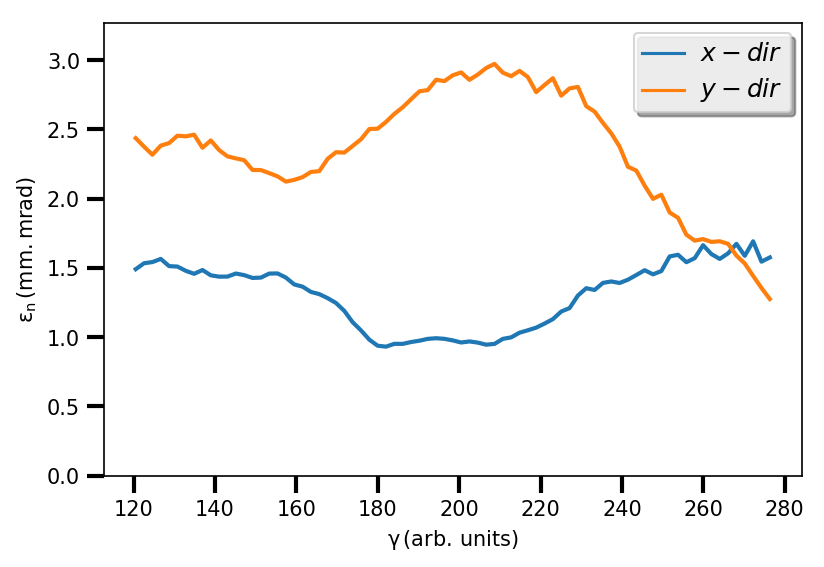

In [30]:
if np.array(ck_all_particles).size!=0:
    # Plotting emittance with respect to gamma
    if 'inline' in matplotlib.get_backend():
        fig, ax = plt.subplots(dpi=150)
    else:
        fig, ax = plt.subplots( figsize=(10,8) )

    fig.patch.set_facecolor('white')
    
    num_dir = 2
    leg = [r"$x-dir$", r"$y-dir$"]
    for i in xrange(num_dir):
        ax.plot(gamma_all[i], emittance_all[i]*1e6, label = leg[i],  linewidth = 2)
    
    ax.set_xlabel(r"$\mathrm{\gamma\,(arb.\,units)}$")
    ax.set_ylabel(r"$\mathrm{\epsilon_{n}\,(mm.mrad)}$")
    ax.set_ylim(0.0, 1.1*max(map(max, emittance_all))*1e6)
    ax.xaxis.set_tick_params(width=2, length = 8)
    ax.yaxis.set_tick_params(width=2, length = 8)
    font = {'family':'sans-serif'}
    plt.rc('font', **font)
    
    if leg is not None:
        # Now add the legend with some customizations.
        legend = plt.legend(loc='best', shadow=True)

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')

        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width

Decomposition by species

In [31]:
gamma_species = []
emittance_species = []

if np.array(ck_all_particles).size!=0:
    for index, sp_name in enumerate(species):
        gammax, emittancex =  sorted_by_quantity_beam_property (  val[it_instant],  
                                                               list(transpose_ck_all_particles[index]), 
                                                               qdict, direction = "x", quantity_to_analyze = "gamma",
                                                               species = sp_name )
        gammay, emittancey =  sorted_by_quantity_beam_property (  val[it_instant],  
                                                               list(transpose_ck_all_particles[index]), 
                                                               qdict, direction = "y", quantity_to_analyze = "gamma",
                                                               species = sp_name )
        gamma_species.append(gammax)
        gamma_species.append(gammay)
        emittance_species.append(emittancex)
        emittance_species.append(emittancey)

A file named sorted_by_gamma_beam_emittance_x_N6_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named sorted_by_gamma_beam_emittance_y_N6_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named sorted_by_gamma_beam_emittance_x_N7_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named sorted_by_gamma_beam_emittance_y_N7_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **


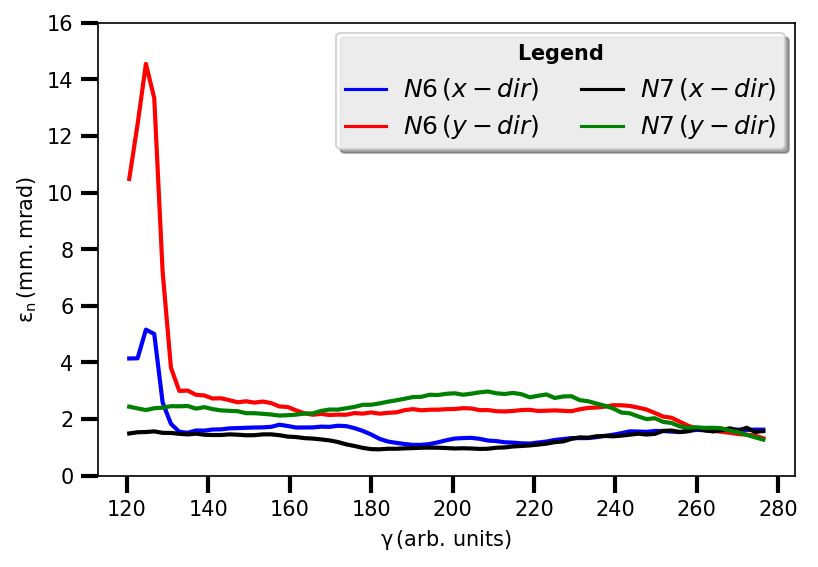

In [32]:
if np.array(ck_all_particles).size!=0:
    # Plotting emittance with respect to gamma
    if 'inline' in matplotlib.get_backend():
        fig, ax = plt.subplots(dpi=150)
    else:
        fig, ax = plt.subplots( figsize=(10,8) )

    fig.patch.set_facecolor('white')
    col = [ "blue", "red", "black", "green", "magenta", "cyan" ]
    leg = [r"$N6\,(x-dir)$", r"$N6\,(y-dir)$", r"$N7\,(x-dir)$",r"$N7\,(y-dir)$"]
    num_species = len(gamma_species)

    for i in xrange( num_species ):

        ax.plot( gamma_species[i], emittance_species[i]*1e6, color = col[i%(num_species + 1)],
                    label = leg[i], linewidth = 2)

    ax.set_xlabel(r"$\mathrm{\gamma\,(arb.\,units)}$")
    ax.set_ylabel(r"$\mathrm{\epsilon_{n}\,(mm.mrad)}$")
    ax.set_ylim(0.0, 1.1*max(map(max, emittance_species))*1e6)
    
    ax.xaxis.set_tick_params(width=2, length = 8)
    ax.yaxis.set_tick_params(width=2, length = 8)
    font = {'family':'sans-serif'}
    plt.rc('font', **font)

    if leg is not None:
        # Now add the legend with some customizations.
        legend = plt.legend(title = r"$\mathbf{Legend}$", loc='best',
                            ncol=2, shadow=True)

        # Set the fontsize
        for label in legend.get_texts():
            label.set_fontsize('large')

        for label in legend.get_lines():
            label.set_linewidth(1.5)  # the legend line width

####Beam divergence

In [33]:
divx  = beam_divergence (c_all_particles, qdict, "x")
divy  = beam_divergence (c_all_particles, qdict, "y")
print "Divergence in x-direction: %f mrad" %(divx*1e3)
print "Divergence in y-direction: %f mrad" %(divy*1e3)

Divergence in x-direction: 6.515932 mrad
Divergence in y-direction: 8.591714 mrad


####Beam total charge

In [34]:
charge = beam_charge(c_all_particles[qdict["w"]])
print "Charge: %f pC" %(charge*1e12) 

Charge: 101.379549 pC


####Beam energy properties sliced by z 

In [35]:
z_species = []
gamma_species = []

if np.array(ck_all_particles).size!=0:
    for index, sp_name in enumerate(species):

        temp_z, temp_gamma = sorted_by_quantity_beam_property (  val[it_instant],  
                                                               list(transpose_ck_all_particles[index]), 
                                                               qdict, direction = None, quantity_to_analyze = "z",
                                                               species = sp_name, b_property = "energy" )
        gamma_species.append( temp_gamma )
        z_species.append( temp_z )

A file named sorted_by_z_beam_energy_N6_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named sorted_by_z_beam_energy_N7_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **


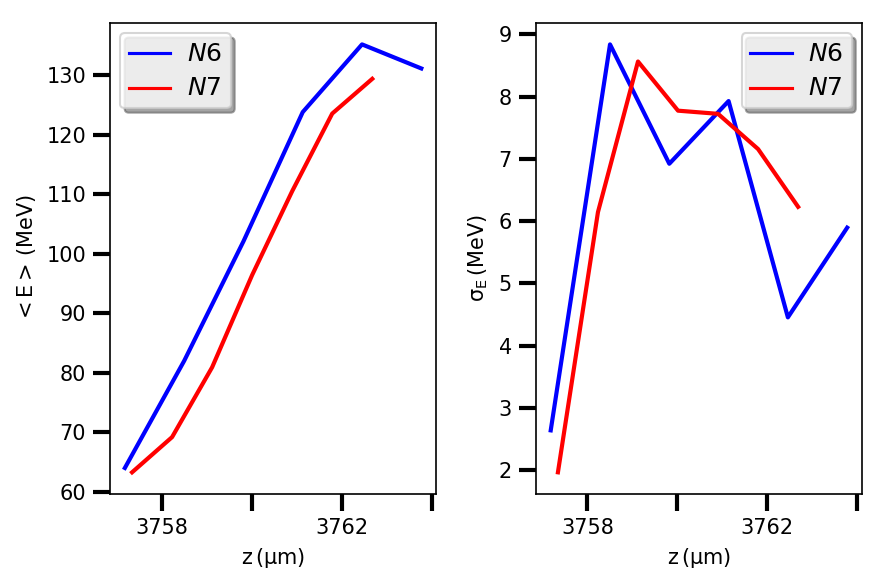

In [36]:
if np.array(ck_all_particles).size!=0:
    # Plotting emittance with respect to gamma
    if 'inline' in matplotlib.get_backend():
        fig, ax = plt.subplots( 1,2, dpi=150 )
    else:
        fig, ax = plt.subplots( 1,2, figsize=(10,8) )

    fig.patch.set_facecolor('white')
    col = [ "blue", "red", "black", "green", "magenta", "cyan" ]
    leg = [[r"$N6$", r"$N7$"], [r"$N6$", r"$N7$"]]
        
    num_species = len(gamma_species)
    s_energy = ["<E>","\sigma_E"]
    
    for j in xrange(2):
        for i in xrange( num_species ):
        
            ax[j].plot( np.array(z_species[i])*1e6, gamma_species[i][j], color = col[i%(num_species + 1)],
                    label = leg[j][i], linewidth = 2)
        
        ax[j].set_xlabel(r"$\mathrm{z\,(\mu m)}$")
        ax[j].set_ylabel(r"$\mathrm{%s\,(MeV)}$" %s_energy[j])
        #ax[j].set_ylim(0.0, 1.1*max(map(max, gamma_species[]))*1e6)
        
        ax[j].xaxis.set_tick_params(width=2, length = 8)
        ax[j].yaxis.set_tick_params(width=2, length = 8)
        plt.setp(ax[j].get_xticklabels()[::2], visible=False)
        
        if leg is not None:
            # Now add the legend with some customizations.
            legend = ax[j].legend(loc='best', shadow=True)

            # Set the fontsize
            for label in legend.get_texts():
                label.set_fontsize('large')

            for label in legend.get_lines():
                label.set_linewidth(1.5)  # the legend line width
                
    font = {'family':'sans-serif'}
    plt.rc('font', **font)
   
    plt.tight_layout()



In [37]:
#Save figure
fig.savefig( res_path + "BeamEnergy_by_z_%s" %val[it_instant] )

####Phase space plot with fields

A file named Charge_density_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **
A file named Normalized_Fields_129000.hdf5 in /Users/pmlee/Documents/LPA_PDB_diagnostics/quickstart_notebook/result/ is created.
** Writing is done **


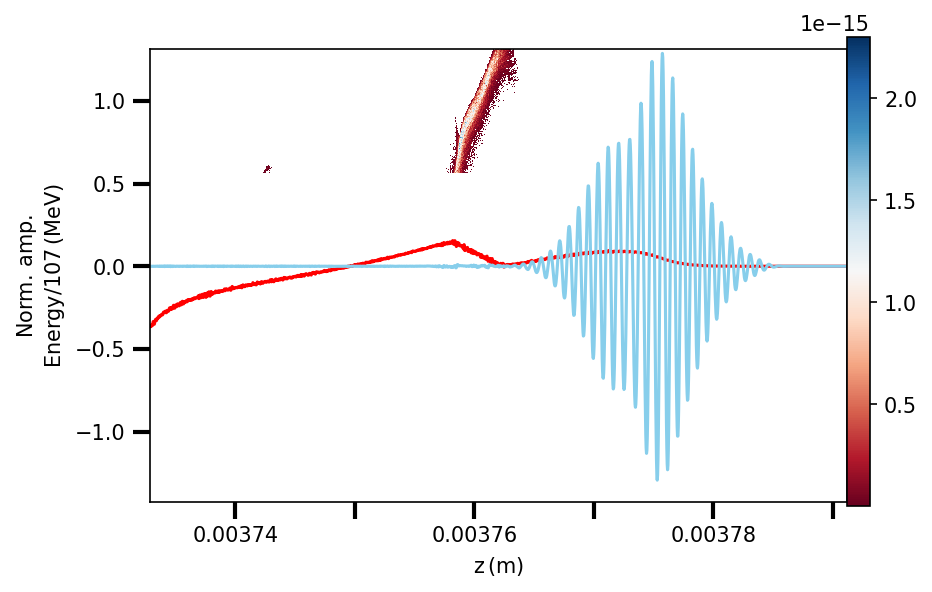

In [38]:
N_laser = f.normalizedField( w0, "laser")
N_wake = f.normalizedField( wp, "wake")

bigPicture( val[it_instant], c_all_particles[qdict["z"]], c_all_particles[qdict["gamma"]],
           c_all_particles[qdict["w"]], f.zfield, N_wake, N_laser, lwrite= True )